# K-Nearest Neighbors (kNN) Classification using Scikit-learn- MNIST Dataset

In [1]:
# Importing useful packages
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Importing the MNIST dataset

mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist

In [3]:
# Splitting the data and target values in X matrix and y vector

X, y = mnist["data"], mnist["target"]
# print("Shape of X: ", X.shape)
# print("Shape of y: ", y.shape)

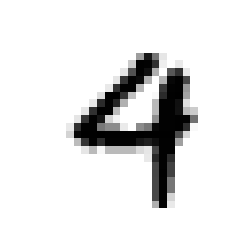

In [4]:
# Randomly checking the dataset with image and label

random_digit = X[18000]
random_digit_image = random_digit.reshape(28, 28)

plt.imshow(random_digit_image, cmap= mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
# print("The number (label) is: ", y[18000])

In [5]:
# Splitting the dataset into training and testing data in 60000 and 10000 images

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
        
# print("The shape of X_train is: ", X_train.shape)
# print("The shape of X_test is: ", X_test.shape)
# print("The shape of y_train is: ", y_train.shape)
# print("The shape of y_test is: ", y_test.shape)

In [6]:
# Shuffling the dataset to ensure cross-validation

shuffle_data = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_data], y_train[shuffle_data]

# print("Shuffled X_train is: ", X_train)
# print("Shuffled y_train is: ", y_train)

In [7]:
# Training the kNN Model using the GridSearchCV and n_neighbors approach

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed: 633.1min remaining: 97.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 633.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [8]:
# Finding the best parameters from the param_grid

grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [9]:
# Finding the best score from grid search

grid_search.best_score_

0.9730833333333333

In [10]:
# Predicting the accuracy of the trained model using the test dataset

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

### References

1. https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
4. https://scikit-learn.org/stable/glossary.html#term-n-jobs
5. https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models
6. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
7. https://www.pyimagesearch.com/2016/08/15/how-to-tune-hyperparameters-with-python-and-scikit-learn/
8. https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
9. https://github.com/ageron/handson-ml
10. ELMS Class Discussion
11. Hands on Machine Learning with Scikit Learn and Tensorflow